In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.shape

(303, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [6]:
categorical = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
numerical = ["age","trtbps","chol","thalachh","oldpeak"]

Text(0.5, 1.0, 'Correlation Matrix')

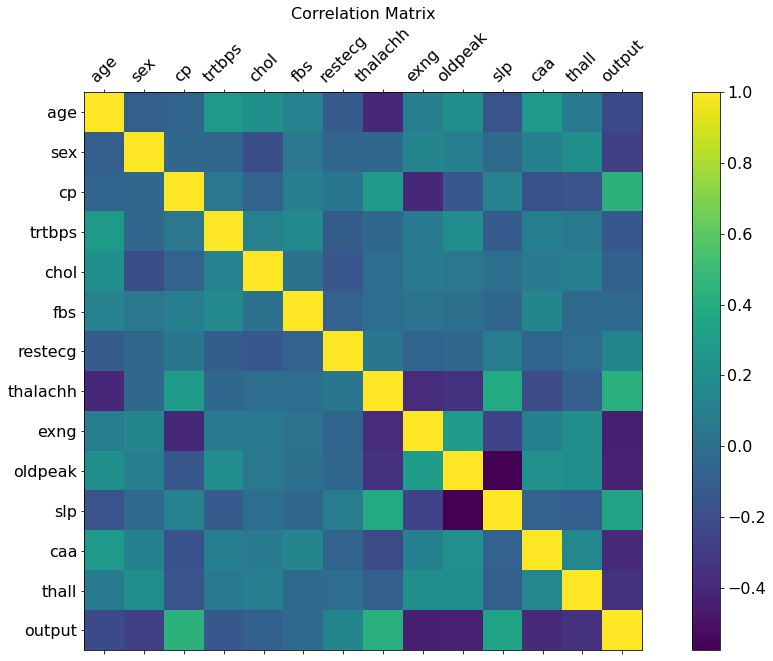

In [7]:
f = plt.figure(figsize=(18, 10))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=16, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=16)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=16)
plt.title('Correlation Matrix', fontsize=16)

In [9]:
X = df.iloc[:,:-1]
y = pd.DataFrame(df["output"])

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.15, random_state = 53)

In [18]:
print("Shape of x train:",x_train.shape,"\nShape of y train:", y_train.shape)
print("Shape of x test:",x_test.shape,"\nShape of y test:", y_test.shape)

Shape of x train: (257, 13) 
Shape of y train: (257, 1)
Shape of x test: (46, 13) 
Shape of y test: (46, 1)


In [19]:
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [21]:
acc_df = pd.DataFrame(columns=["Name", "Accuracy_score", "AUC_score", "F1_score"])

In [22]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB().fit(x_train, y_train)
y_pred = model.predict(x_test)

acc = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("The test accuracy score is ", acc)
print("The test AUC score is", auc)
print("The test F1 score is", f1)

a_series = pd.Series(["GaussianNB", acc, auc, f1], index = acc_df.columns)
acc_df = acc_df.append(a_series, ignore_index=True)


The test accuracy score is  0.8695652173913043
The test AUC score is 0.8693181818181819
The test F1 score is 0.8636363636363636


In [23]:
from sklearn.naive_bayes import BernoulliNB

model = BernoulliNB().fit(x_train, y_train)
y_pred = model.predict(x_test)

acc = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("The test accuracy score is ", acc)
print("The test AUC score is", auc)
print("The test F1 score is", f1)

a_series = pd.Series(["BernoulliNB", acc, auc, f1], index = acc_df.columns)
acc_df = acc_df.append(a_series, ignore_index=True)

The test accuracy score is  0.9565217391304348
The test AUC score is 0.956439393939394
The test F1 score is 0.9545454545454546


In [24]:
acc_df

,Name,Accuracy_score,AUC_score,F1_score
0,GaussianNB,0.869565,0.869318,0.863636
1,BernoulliNB,0.956522,0.956439,0.954545


In [25]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors= 4).fit(x_train, y_train)  
y_pred = model.predict(x_test)

acc = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("The test accuracy score is ", acc)
print("The test AUC score is", auc)
print("The test F1 score is", f1)

a_series = pd.Series(["KNN", acc, auc, f1], index = acc_df.columns)
acc_df = acc_df.append(a_series, ignore_index=True)

The test accuracy score is  0.8913043478260869
The test AUC score is 0.8901515151515152
The test F1 score is 0.8837209302325582


In [26]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 100, max_depth=4).fit(x_train, y_train)  
y_pred = model.predict(x_test)


acc = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("The test accuracy score is ", acc)
print("The test AUC score is", auc)
print("The test F1 score is", f1)

a_series = pd.Series(["RandomForest", acc, auc, f1], index = acc_df.columns)
acc_df = acc_df.append(a_series, ignore_index=True)

The test accuracy score is  0.9130434782608695
The test AUC score is 0.9128787878787878
The test F1 score is 0.9090909090909091


In [27]:
from sklearn.svm import SVC

model = SVC().fit(x_train,y_train)
y_pred = model.predict(x_test)

acc = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("The test accuracy score is ", acc)
print("The test AUC score is", auc)
print("The test F1 score is", f1)

a_series = pd.Series(["SVC", acc, auc, f1], index = acc_df.columns)
acc_df = acc_df.append(a_series, ignore_index=True)

The test accuracy score is  0.8695652173913043
The test AUC score is 0.8693181818181819
The test F1 score is 0.8636363636363636


In [28]:
acc_df

,Name,Accuracy_score,AUC_score,F1_score
0,GaussianNB,0.869565,0.869318,0.863636
1,BernoulliNB,0.956522,0.956439,0.954545
2,KNN,0.891304,0.890152,0.883721
3,RandomForest,0.913043,0.912879,0.909091
4,SVC,0.869565,0.869318,0.863636


In [30]:
X[0:5]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [34]:
X = scaler.fit_transform(X)
clf = BernoulliNB().fit(X, y)
x_new = [[51,0,1,140,204,0,0,163,0,1.4,2,0,2]]
x_new = scaler.fit_transform(x_new)
y_pred = clf.predict(x_new)
y_pred


array([1], dtype=int64)

In [41]:
Age = int(input("Enter your patient age: "))
Sex = input("Enter your patient sexuality(male/[female]): ").lower
if Sex == 'male':
    Sex = 1
else:
    Sex = 0
exang = int(input("Does exercise induced angina?(1 = yes/0 = no)"))
ca = int(input("Enter number of major vessels (0-3): "))
cp = int(input("Type of chest pain (1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 0 = asymptomatic): "))
trestbps = int(input("resting blood pressure: "))
chol = int(input("cholestoral in mg/dl: "))
fbs = int(input("Does your patient fasting blood sugar > 120 mg/dl?(1 = true/0 = false): "))
restecg = int(input("resting electrocardiographic results(1 = normal,2 = having ST-T wave abnormality,0 = hypertrophy): "))
thalach = int(input("maximum heart rate achieved: "))
oldpeak = float(input("ST depression induced by exercise relative to rest: "))
slp = int(input("the slope of the peak exercise ST segment(2 = upsloping,1 = flat,0 = downsloping): "))
thal = int(input("Thal rate(2=normal,1=fixed defect,3=reversable defect): "))

Answer = [[Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slp,ca,thal]]
Answer = scaler.fit_transform(Answer)
y_pred = clf.predict(Answer)
if y_pred[0] == 0:
    print ("less chance of heart attack")
if y_pred[0] == 1:
    print ("At risk of heart attack!!!")

Enter your patient age: 44
Enter your patient sexuality(male/[female]): female
Does exercise induced angina?(1 = yes/0 = no)0
Enter number of major vessels (0-3): 3
Type of chest pain (1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 0 = asymptomatic): 3
resting blood pressure: 89
cholestoral in mg/dl: 104
Does your patient fasting blood sugar > 120 mg/dl?(1 = true/0 = false): 0
resting electrocardiographic results(1 = normal,2 = having ST-T wave abnormality,0 = hypertrophy): 1
maximum heart rate achieved: 145
ST depression induced by exercise relative to rest: 1.8
the slope of the peak exercise ST segment(2 = upsloping,1 = flat,0 = downsloping): 1
Thal rate(2=normal,1=fixed defect,3=reversable defect): 2
At risk of heart attack!!!
